In [11]:
import numpy as np

In [12]:
# Input data
X = np.array([[1,0,0,1,1, 1,1,0,1,1, 1,1,0,1,1, 1,1,0,1,1, 1,0,0,0,1],
              [0,0,0,0,1, 1,1,1,1,0, 1,0,0,0,1, 0,1,1,1,1, 0,0,0,0,0],
              [0,0,0,0,1, 1,1,1,1,0, 1,0,0,0,1, 1,1,1,1,0, 0,0,0,0,1],
              [1,1,1,0,1, 1,1,0,0,1, 1,0,1,0,1, 0,0,0,0,0, 1,1,1,0,1],
              [0,0,0,0,0, 0,1,1,1,1, 0,0,0,0,1, 1,1,1,1,0, 0,0,0,0,1]])

# Output data
y = np.array([[1,0,0,0,0],
              [0,1,0,0,0],
              [0,0,1,0,0],
              [0,0,0,1,0],
              [0,0,0,0,1]])

In [13]:
input_layer_neurons = X.shape[1]
hidden_layer_neurons = 50
output_layer_neurons = y.shape[1]
print(f"Input Neurons: {input_layer_neurons}\nHidden Neurons: {hidden_layer_neurons}\nOutput Neurons: {output_layer_neurons}")

Input Neurons: 25
Hidden Neurons: 50
Output Neurons: 5


In [14]:
# Random initialization of weights
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(hidden_layer_neurons, input_layer_neurons)
W2 = np.random.randn(output_layer_neurons, hidden_layer_neurons)
alpha = 0.9
mse = []

In [15]:
# Get the size of X
size_of_X = X.shape[0]
for epochs in range(500):
    total_error = 0
    for value in range(size_of_X):
        x = X[value, :]
        d = y[value]

        # Forward pass
        weighted_sum_input2hidden = np.dot(W1, x)
        sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))

        weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
        sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))

        # Calculate error
        error = d - sigmoid_hidden2output
        total_error += np.sum(error**2)
        delta_output = sigmoid_hidden2output * (1 - sigmoid_hidden2output) * error

        # Backpropagation
        error_at_hidden = np.dot(W2.T, delta_output)
        delta_hidden = sigmoid_input2hidden * (1 - sigmoid_input2hidden) * error_at_hidden

        # Weight updates
        dW1 = alpha * np.dot(delta_hidden.reshape(-1, 1), x.reshape(1, -1))
        W1 = W1 + dW1
        dW2 = alpha * np.dot(delta_output.reshape(-1, 1), sigmoid_input2hidden.reshape(1, -1))
        W2 = W2 + dW2

    mse.append(total_error / size_of_X)
mse = np.array(mse).flatten()

In [16]:
mse.shape

(500,)

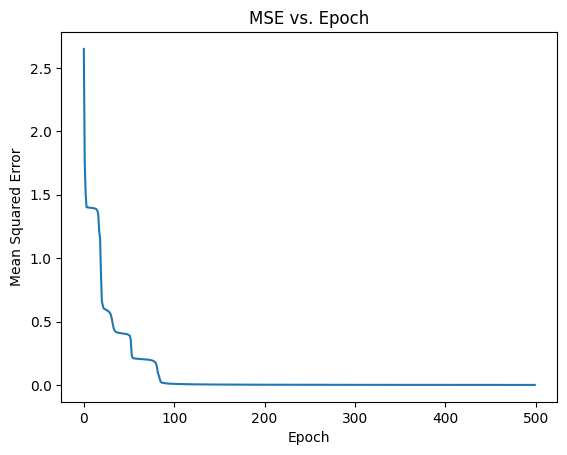

In [17]:
import matplotlib.pyplot as plt
# Plot the mean squared error
plt.plot(range(500), mse)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epoch')
plt.show()

In [18]:
# Assuming x_new is a 1D array representing a single input
def predict(x_new):
    x = x_new.reshape(-1, 1)
    
    # Forward pass
    weighted_sum_input2hidden = np.dot(W1, x)
    sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))

    weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
    sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))
    
    # Assuming sigmoid_hidden2output is a 1D array representing the output layer
    # The predicted class is the index of the maximum value in sigmoid_hidden2output
    predicted_class = np.argmax(sigmoid_hidden2output)
    
    return predicted_class


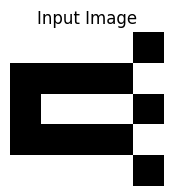

Predicted digit: 3


In [19]:
# Example usage
x_new = np.array([0,0,0,0,1, 1,1,1,1,0, 1,0,0,0,1, 1,1,1,1,0, 0,0,0,0,1])
image = x_new.reshape(5,5)
# Plot the image
plt.figure(figsize=(2,2))
plt.title("Input Image")
plt.imshow(image, cmap='binary')
plt.axis('off')  # Hide axes
plt.show()
predicted_digit = predict(x_new)
print(f"Predicted digit: {predicted_digit+1}")

In [20]:
# Training code

# Inference loop
for k in range(5):  # Inference
    x = X[k, :].reshape(-1, 1)
    # Forward pass
    weighted_sum_input2hidden = np.dot(W1, x)
    sigmoid_input2hidden = 1 / (1 + np.exp(-weighted_sum_input2hidden))

    weighted_sum_hidden2output = np.dot(W2, sigmoid_input2hidden)
    sigmoid_hidden2output = 1 / (1 + np.exp(-weighted_sum_hidden2output))
    print(f"Predicted output for image {k+1}:", sigmoid_hidden2output.T)



Predicted output for image 1: [[9.84999842e-01 8.17254525e-03 4.66351736e-04 9.04989337e-03
  6.93616706e-03]]
Predicted output for image 2: [[0.01104809 0.97916653 0.01723294 0.00815269 0.00674923]]
Predicted output for image 3: [[0.00570397 0.01677865 0.97484491 0.00218918 0.01557478]]
Predicted output for image 4: [[0.00283582 0.00775769 0.00722663 0.98754276 0.00119739]]
Predicted output for image 5: [[0.01017641 0.00454448 0.01713388 0.0057257  0.98279287]]
